# EDA on Titanic Dataset

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preview

In [2]:
df_train = pd.read_csv('titanic_train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Finding and dealing with missing vals

In [4]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


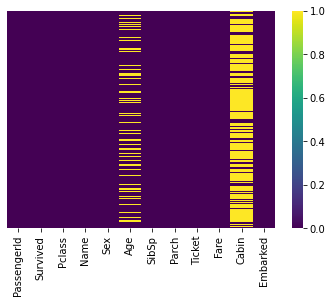

In [5]:
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='viridis')
plt.show()

<b> We can see 'age' coloumn has 20% missing data which can be filled with imputations while 'cabin' column has way more missing data so it can be dropped.

## Plotting the survival counts for different features

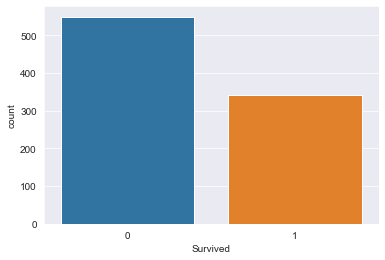

In [6]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df_train)
plt.show()

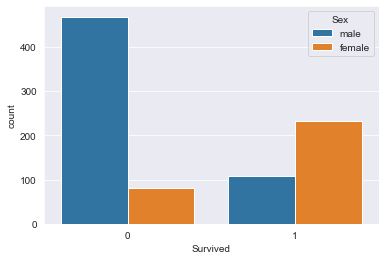

In [7]:
# For gender
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df_train,hue='Sex')
plt.show()

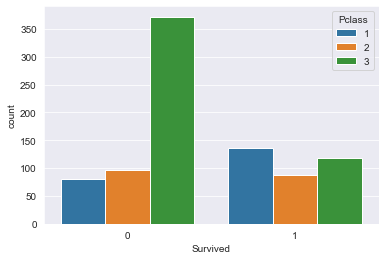

In [8]:
# Based on passenger class
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df_train,hue='Pclass')
plt.show()

## Plotting age distribution

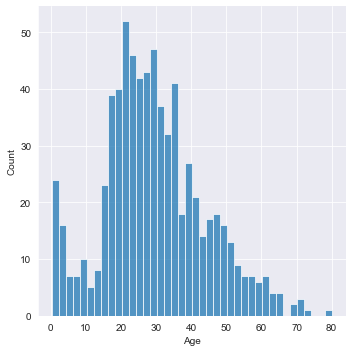

In [9]:
sns.set_style('darkgrid')
sns.displot(df_train['Age'].dropna(),bins=40,kde=False)
plt.show()

## Plotting sibling-spouse count

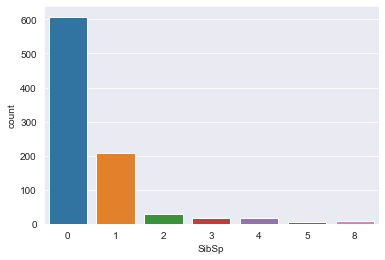

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='SibSp',data=df_train)
plt.show()

## Data Cleaning
We will be filling vals in missing cells of "Age" column using avearge age of passenger class

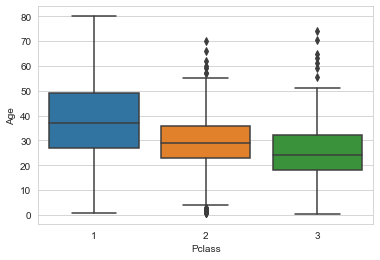

In [11]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=df_train)
plt.show()

Thus the average age of Pclass 1,2,3 is 37,28,25 respectively

In [12]:
#Function for replacing missing vals of age according to passenger class
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 28
        if Pclass == 3:
            return 24
    else:
        return Age

In [13]:
#Applying impute function
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

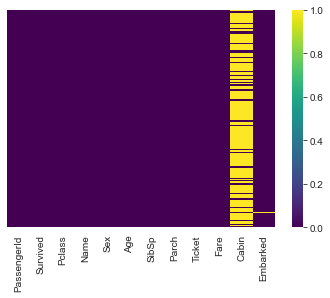

In [14]:
#Checking if missing vals have been filled using heatmap
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='viridis')
plt.show()

Thus all missing vals in age have been filled

In [15]:
#Dropping "Cabin" column
df_train.drop(columns='Cabin',inplace=True)

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


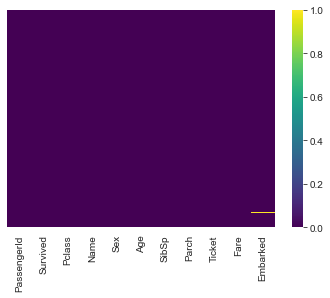

In [17]:
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='viridis')
plt.show()

<b> Thus the data contains no missing vals and it is cleaned

## Converting categorical features

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
#Using get_dummies function
Embark_conv = pd.get_dummies(data=df_train['Embarked']).head()

In [20]:
Sex_conv = pd.get_dummies(data=df_train['Sex'],drop_first=True).head()

In [21]:
df_train.drop(columns=['PassengerId','Name','Sex','Ticket','Embarked'],inplace=True)

In [22]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [23]:
#Adding converted columns to dataset
pd.concat([df_train,Sex_conv,Embark_conv],axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,NaN,NaN,NaN
887,1,1,19.0,0,0,30.0000,NaN,NaN,NaN,NaN
888,0,3,24.0,1,2,23.4500,NaN,NaN,NaN,NaN
889,1,1,26.0,0,0,30.0000,NaN,NaN,NaN,NaN


In [24]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


<b> Thus data is ready for model training

## Building Logistic Regression Model

In [25]:
X = df_train.drop(columns="Survived")

In [26]:
y = df_train["Survived"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model = LogisticRegression()

In [31]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = log_model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [34]:
confusion_matrix(y_test,y_pred)

array([[94, 11],
       [37, 37]], dtype=int64)

In [35]:
f1_score(y_test,y_pred)

0.6065573770491803

In [36]:
accuracy_score(y_test,y_pred)

0.7318435754189944